In [2]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import normalize
from scipy.stats import norm , zipf , gompertz 
import datetime
from sklearn import preprocessing
from pandas.plotting import lag_plot ,autocorrelation_plot
from statsmodels.tsa.api import SimpleExpSmoothing

In [3]:
ARCB = pd.read_csv('data/ARCB.csv')
CVLG = pd.read_csv('data/CVLG.csv')
HTLD = pd.read_csv('data/HTLD.csv')
MRTN = pd.read_csv('data/MRTN.csv')
ODFL = pd.read_csv('data/ODFL.csv')
PTSI = pd.read_csv('data/PTSI.csv')
SAIA = pd.read_csv('data/SAIA.csv')
names = ['ARCB','CVLG ','HTLD','MRTN','ODFL','PTSI','SAIA']
data = ['data/ARCB.csv','data/CVLG.csv','data/HTLD.csv','data/MRTN.csv','data/ODFL.csv','data/PTSI.csv','data/SAIA.csv']
df = {i : pd.read_csv(f'{i}') for i in data}

# S

In [4]:
arcb_close_volume = ARCB.Close * ARCB.Volume
cvlg_close_volume = CVLG.Close * CVLG.Volume
htld_close_volume = HTLD.Close * HTLD.Volume
mrtn_close_volume = MRTN.Close * MRTN.Volume
odfl_close_volume = ODFL.Close * ODFL.Volume
ptsi_close_volume = PTSI.Close * PTSI.Volume
saia_close_volume = SAIA.Close * SAIA.Volume
S = arcb_close_volume + cvlg_close_volume + htld_close_volume + mrtn_close_volume + odfl_close_volume + ptsi_close_volume + saia_close_volume
Q = dict()

for i in data:
    df[i]["S"] = df[i]["Close"]* df[i]["Volume"]
    Q[i] = sum(df[i]["S"])
    df[i]["Date"] = pd.to_datetime(df[i]["Date"])
    

In [5]:
x = ((S - min(S))/(max(S) - min(S))) + 1
x

0       1.004770
1       1.002773
2       1.004448
3       1.008261
4       1.006736
          ...   
4023    1.075567
4024    1.130091
4025    1.084425
4026    1.085078
4027    1.068970
Length: 4028, dtype: float64

In [6]:
for i in df:
    df[i]["Date"] = pd.to_datetime(df[i]["Date"])
    df[i].index = df[i]["Date"]
    df[i] = df[i].drop("Date", axis = 1)
    df[i] = df[i].loc["2001-07-20":]
    df[i]["Date"] = df[i].index
    df[i].index = range(0, df[i].shape[0]) 
df[i]

,Open,High,Low,Close,Adj Close,Volume,S,Date
0,11.266667,11.673333,11.266667,11.593333,11.593333,102300,1.185998e+06,2005-09-06
1,11.566667,11.673333,11.433333,11.500000,11.500000,64950,7.469250e+05,2005-09-07
2,11.400000,11.406667,10.920000,10.960000,10.960000,41550,4.553880e+05,2005-09-08
3,10.946667,11.053333,10.860000,11.026667,11.026667,129150,1.424094e+06,2005-09-09
4,10.980000,11.120000,10.886667,11.080000,11.080000,103050,1.141794e+06,2005-09-12
...,...,...,...,...,...,...,...,...
4023,240.199997,245.380005,237.190002,245.059998,245.059998,297300,7.285634e+07,2021-08-30
4024,245.830002,245.830002,239.619995,240.130005,240.130005,256300,6.154532e+07,2021-08-31
4025,241.350006,246.649994,237.029999,244.320007,244.320007,173900,4.248725e+07,2021-09-01
4026,246.110001,248.779999,245.070007,246.389999,246.389999,145100,3.575119e+07,2021-09-02


Нормализация

In [7]:
S = np.zeros(4028) 
for i in data:
    df[i]["CV"] = df[i]["Close"]* df[i]["Volume"]
    S = S + df[i]["CV"]
S

0       1.887298e+07
1       1.309556e+07
2       1.794239e+07
3       2.897493e+07
4       2.456112e+07
            ...     
4023    2.237408e+08
4024    3.815195e+08
4025    2.493749e+08
4026    2.512638e+08
4027    2.046514e+08
Name: CV, Length: 4028, dtype: float64

# Простое экспоненциальное сглаживание



(0.0, 4000.0)

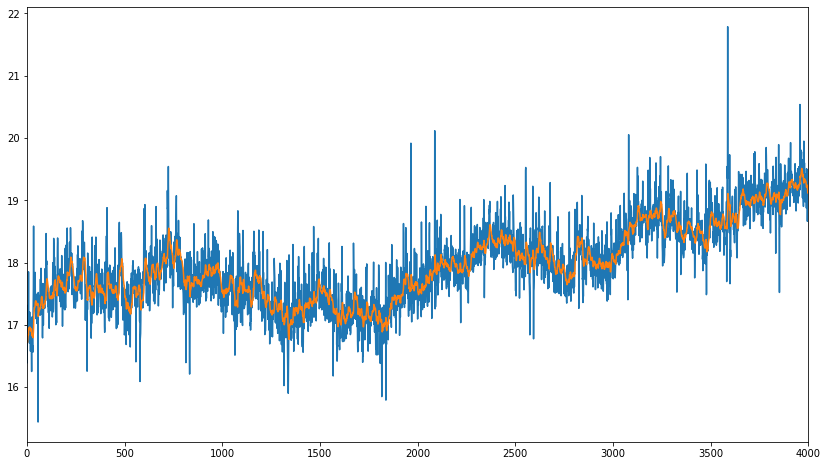

In [9]:
plt.figure(figsize = (14,8))
plt.plot(range(0, S.shape[0]), np.log(S))
fit1 = SimpleExpSmoothing(np.log(S)).fit(smoothing_level=0.1,optimized=False)
plt.plot(range(0, S.shape[0]), fit1.fittedvalues)
plt.xlim(0, 4000)

In [10]:
for i in data:
    for j in df[i].drop("Date", axis = 1):
        df[i][j] = normalize(df[i][j].to_numpy().reshape(1,-1)).reshape(-1)
df['data/ARCB.csv']

,Open,High,Low,Close,Adj Close,Volume,S,Date,CV
0,0.016403,0.016494,0.016733,0.016697,0.014982,0.007208,0.007843,2005-09-06,0.007843
1,0.016757,0.016465,0.016851,0.016735,0.015017,0.005023,0.005478,2005-09-07,0.005478
2,0.016657,0.016386,0.016758,0.016596,0.014892,0.007995,0.008647,2005-09-08,0.008647
3,0.016417,0.016108,0.016250,0.016137,0.014479,0.009461,0.009949,2005-09-09,0.009949
4,0.016063,0.015897,0.016264,0.015959,0.014320,0.008581,0.008924,2005-09-12,0.008924
...,...,...,...,...,...,...,...,...,...
4023,0.032758,0.032560,0.032749,0.032953,0.035391,0.003951,0.008485,2021-08-30,0.008485
4024,0.032758,0.032301,0.032324,0.031962,0.034326,0.006058,0.012619,2021-08-31,0.012619
4025,0.032202,0.032917,0.032021,0.033006,0.035447,0.013849,0.029788,2021-09-01,0.029788
4026,0.033150,0.033321,0.033525,0.033475,0.035952,0.005758,0.012561,2021-09-02,0.012561


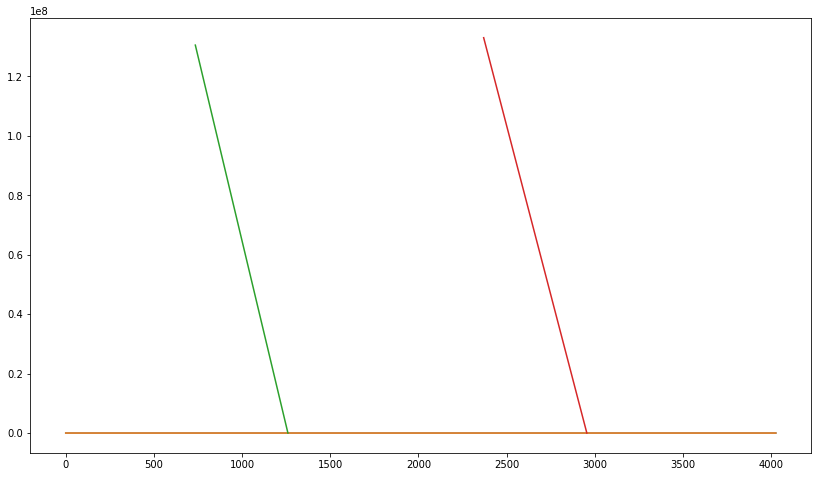

(0.0, 4000.0)

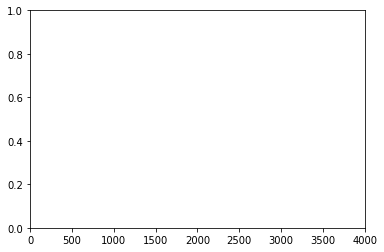

In [72]:
line1_x = [735,1260]
line2_x = [2370,2955]
plt.figure(figsize = (14,8))
plt.plot(range(0, S.shape[0]), np.log(S))
fit1 = SimpleExpSmoothing(np.log(S)).fit(smoothing_level=0.1,optimized=False)
plt.plot(range(0, S.shape[0]), fit1.fittedvalues)
plt.plot(line1_x, [1.305 *100000000, 0])
plt.plot(line2_x, [1.33 * 100000000, 0])
plt.show()
plt.xlim(0, 4000)

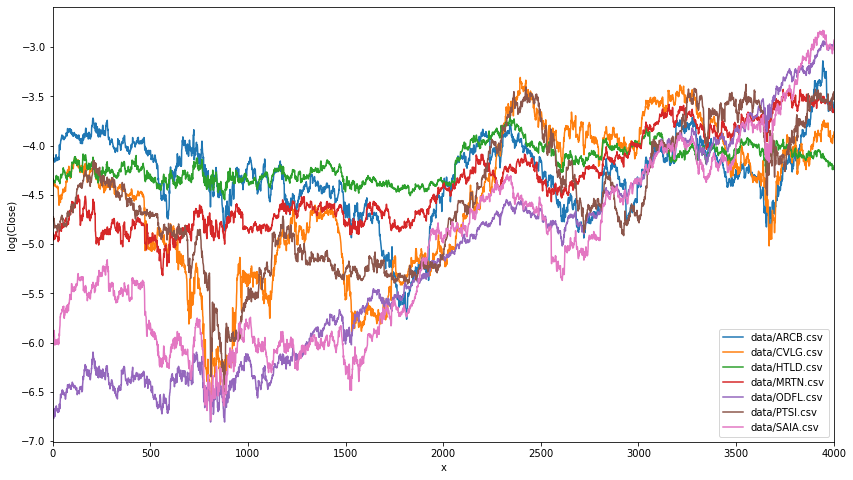

In [12]:
plt.figure(figsize = (14,8))
for i in data:
    plt.plot(df[i].index,np.log(df[i]["Close"]), label=i)
    plt.xlim(0, 4000)
    plt.legend()
    plt.ylabel("log(Close)")
    plt.xlabel('x')
plt.show()

In [13]:
min_S = min(S)
max_S = max(S)
S_norm = (S - min_S)/(max_S - min_S)
min_S, max_S

(5070107.613140999, 2898816323.1464)

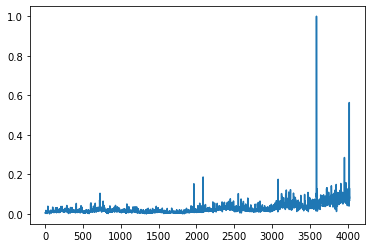

In [14]:
for i in data:
    df[i]["CV"] = df[i]["CV"]/(max_S - min_S)
plt.plot(S_norm)
plt.show()

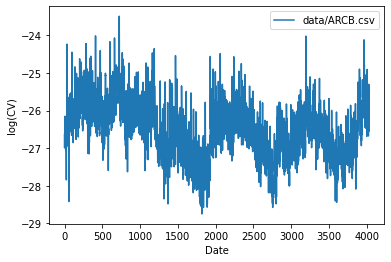

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


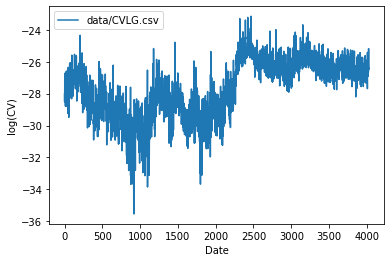

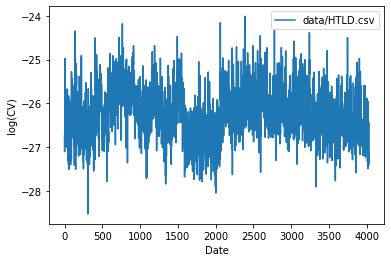

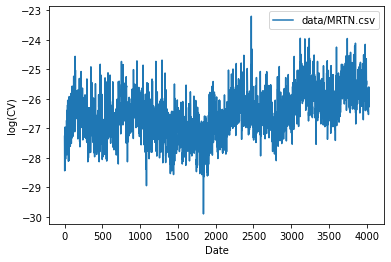

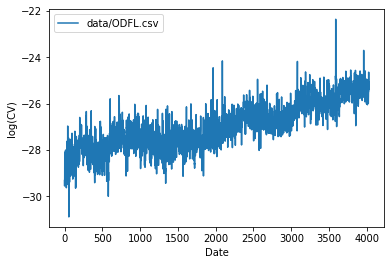

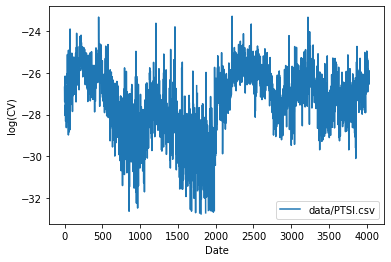

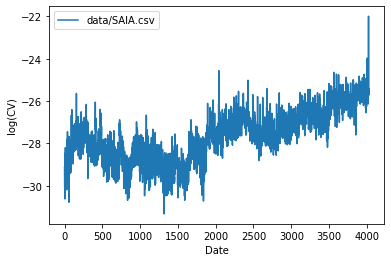

In [15]:
fig, ax = plt.subplots()
for i in data:
    plt.plot(np.log(df[i]["CV"]), label=i)
    plt.legend()
    plt.ylabel("log(CV)")
    plt.xlabel("Date")
    plt.show()

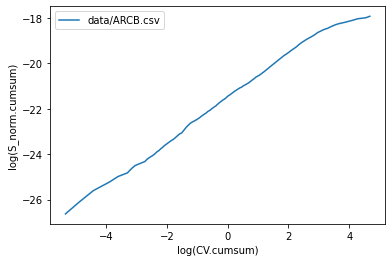

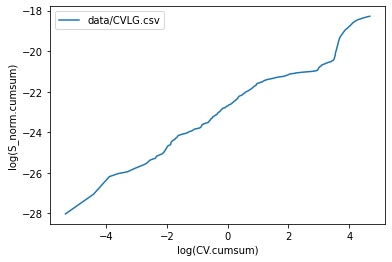

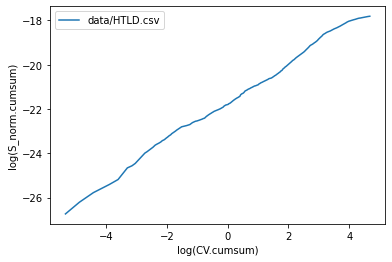

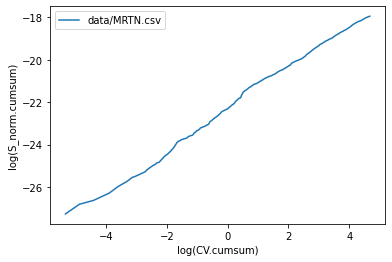

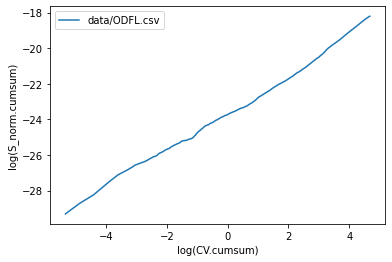

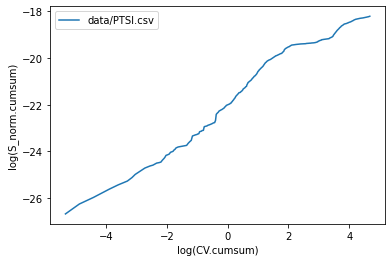

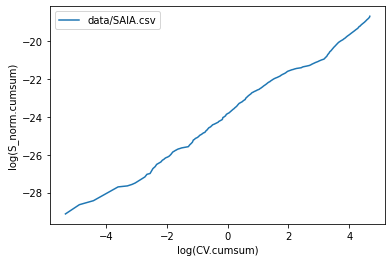

In [16]:
fig, ax = plt.subplots()
for i in data:
    plt.plot(np.log(S_norm.cumsum()), np.log(df[i]["CV"].cumsum()), label=i)
    plt.legend()
    plt.ylabel("log(S_norm.cumsum)")
    plt.xlabel("log(CV.cumsum)")
    plt.show()

доли каждой фирмы

In [17]:
dols = {}
k = 0
for i in df:
    k += df[i]['S'].iloc[-1]
for i in df:
    dols[i] = ((df[i]['S'].iloc[-1]/k))
dols= {w:v for w,v in sorted(dols.items() , key = lambda item: item[1]) }
dols

{'data/HTLD.csv': 0.0349424975313391,
 'data/CVLG.csv': 0.09263126786921955,
 'data/ARCB.csv': 0.09823442097331589,
 'data/MRTN.csv': 0.11260646330603391,
 'data/PTSI.csv': 0.15346074298352153,
 'data/SAIA.csv': 0.2503278334322,
 'data/ODFL.csv': 0.2577967739043699}

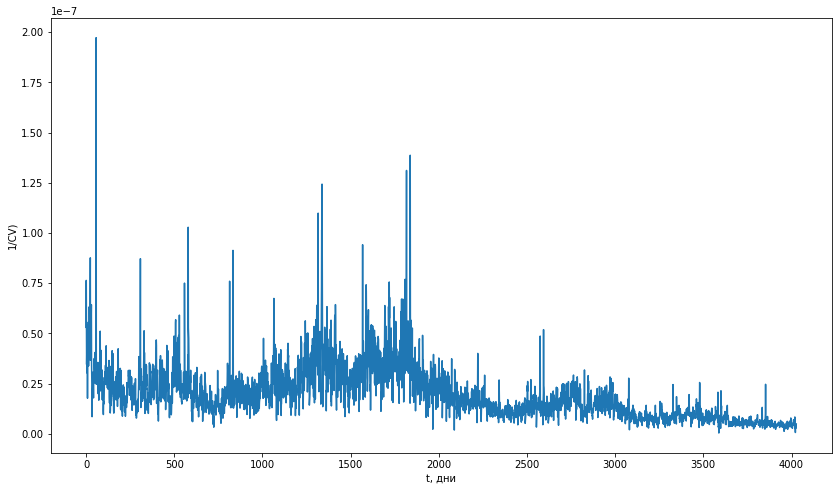

In [18]:
plt.figure(figsize=(14,8)) 
plt.xlabel("t, дни")
plt.ylabel("1/CV)")
plt.plot(1/S)

In [ ]:
for i in data:
    for j in data:
        plt.figure(figsize=(14,8)) 
        plt.xlabel(i + "log(CV)")
        plt.ylabel(j + "log(CV)")
        plt.plot(np.log(df[i]["CV"]), np.log(df[j]["CV"]), label=i, marker='o', ls='')

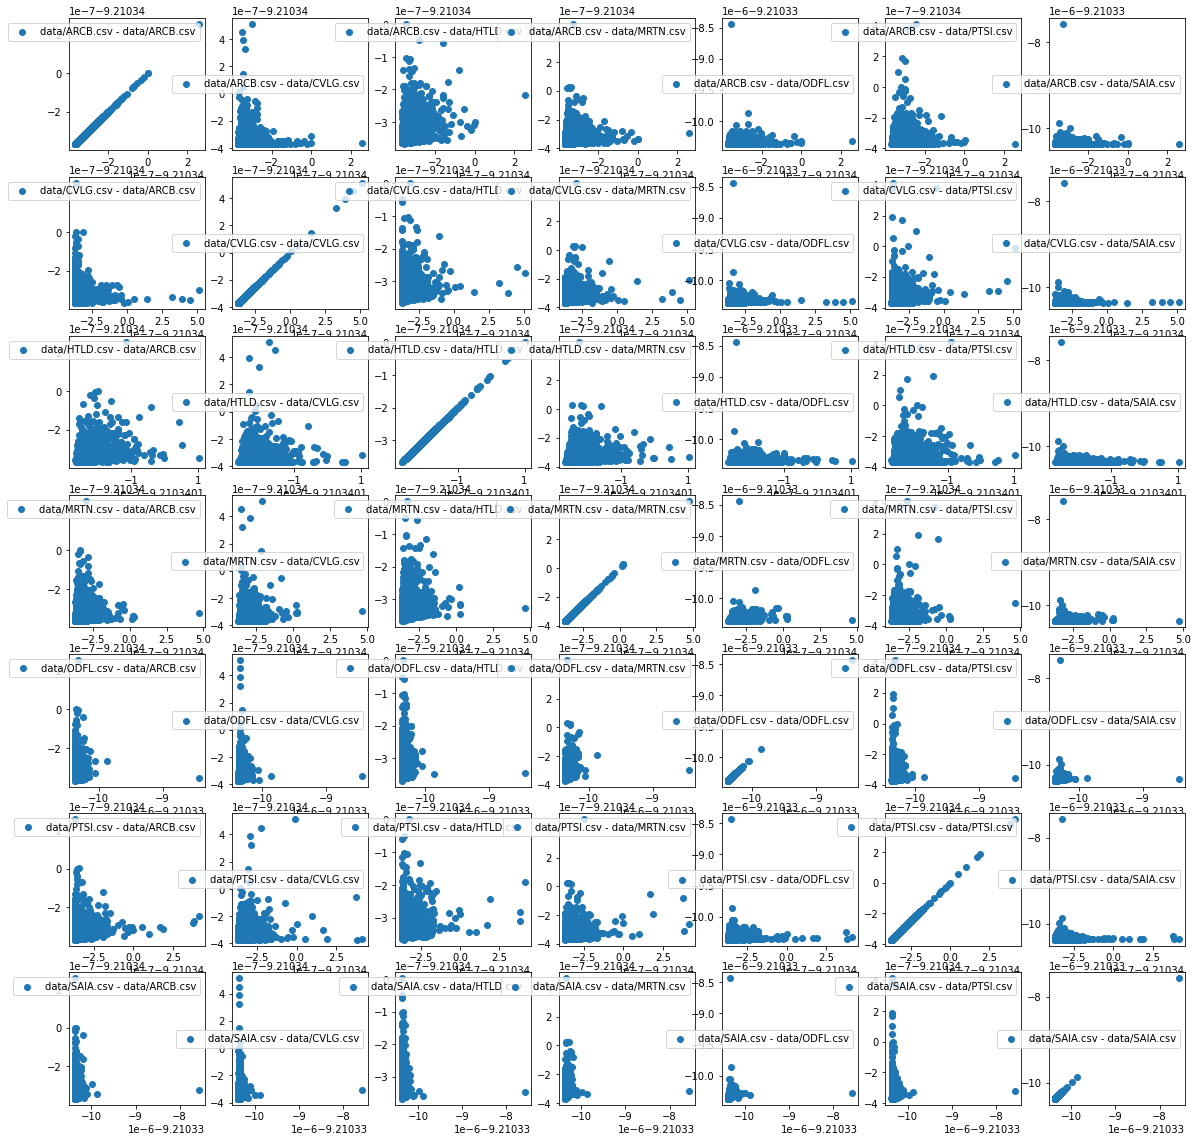

In [24]:
fig = plt.figure(figsize=(20, 20))
cnt = 1
for i in data:
    for j in data:
        ax = fig.add_subplot(len(data),len(data),cnt)
        cnt += 1
        ax.scatter(np.log(df[i]['CV'] + 1e-4),np.log(df[j]['CV'] + 1e-4), label= i + " - " + j)
        ax.legend(loc='best')
# ax.xlabel("ln " + i)
# ax.ylabel("ln " + j)
plt.show()

модель гомперца по Close



построить доли фирм от S в полулогарифмическом маштабе

In [20]:
values_dols = []
for k, v in dols.items(): 
    values_dols.append(v)
S_norm = np.array(S)
S_norm =  preprocessing.normalize([S_norm])


In [21]:
S_norm

array([[0.00257078, 0.00178381, 0.00244402, ..., 0.03396863, 0.03422593,
        0.02787662]])

ValueError: too many values to unpack (expected 2)

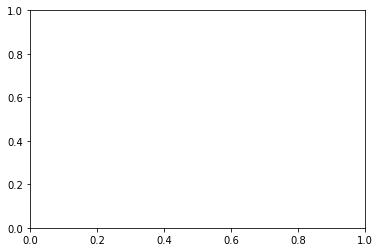

In [23]:
fig, ax = plt.subplots()
ax.set_xlim(S)
plt.plot(values_dols)
plt.show()

раноговое распределение

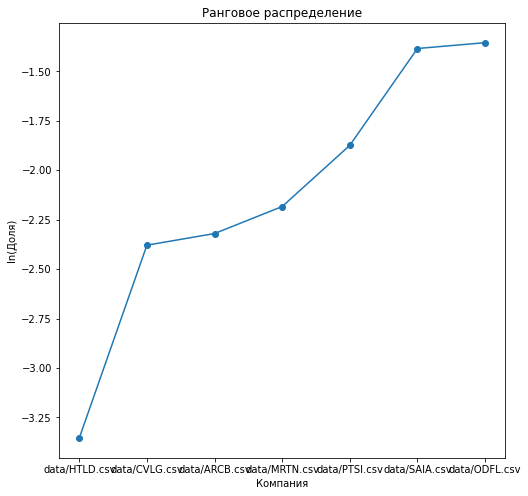

In [24]:
a = {}
summ = 0
for i in df:
    summ += df[i]["CV"].iloc[-1]
for i in df:
    a[i] = ((df[i]["CV"].iloc[-1]/summ))
a = {k: v for k, v in sorted(a.items(), key=lambda item: item[1])}
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('Ранговое распределение')
ax.set_xlabel("Компания")
ax.set_ylabel("ln(Доля)")

ax.plot(list(a.keys()), np.log(list(a.values())), marker='o')

(0.0, 300000000.0)

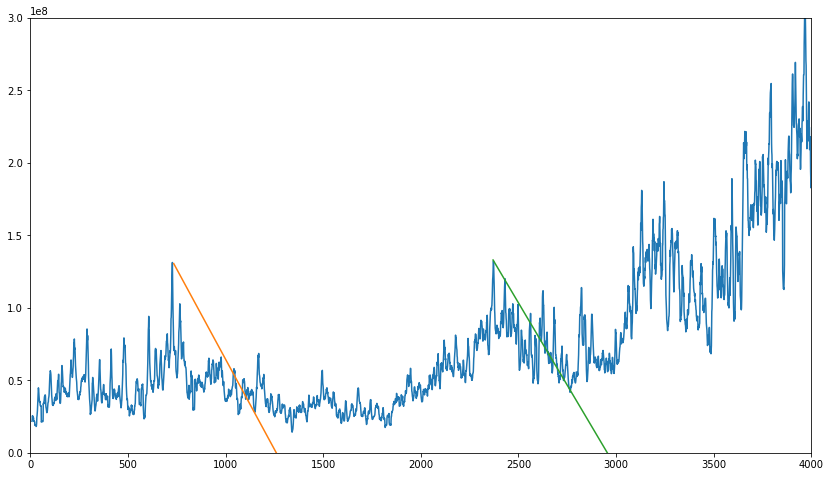

In [36]:
line1_x = [735,1260]
line2_x = [2370,2955]

plt.figure(figsize = (14,8))
s = pd.Series(1/(S)).rolling(window=10).mean()
plt.plot(range(0, S.shape[0]), (1/s))
plt.plot(line1_x, [1.305 *100000000, 0])
plt.plot(line2_x, [1.33 * 100000000, 0])
plt.xlim(0, 4000)
plt.ylim(0, 3e8)



(0.0, 4000.0)

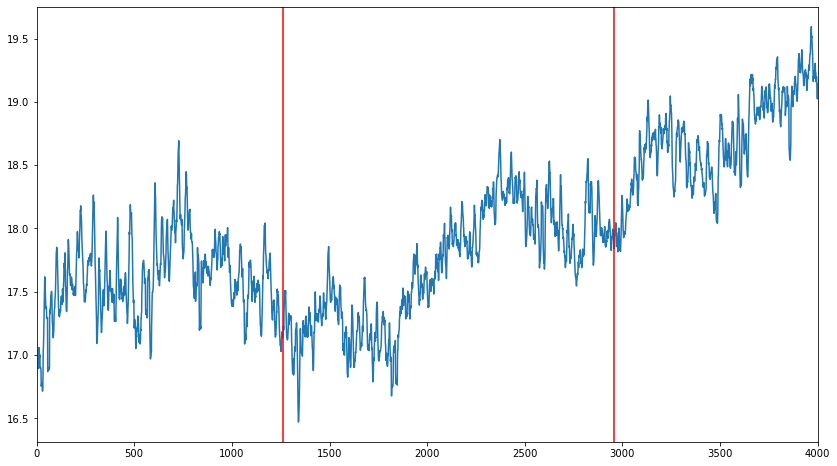

In [37]:
plt.figure(figsize = (14,8))
line1_x = [1260,1260]
line2_x = [2955,2955]    
plt.plot(range(0, S.shape[0]), np.log(1/s))
plt.axvline(line1_x[0],color='red')
plt.axvline(line2_x[0],color='red')
plt.xlim(0, 4000)

In [37]:
S_sma = pd.Series(S).rolling(window=10).mean()
cumsum_S = np.cumsum(S_sma)
gompertz = np.log(S_sma/cumsum_S)

Гомпертц

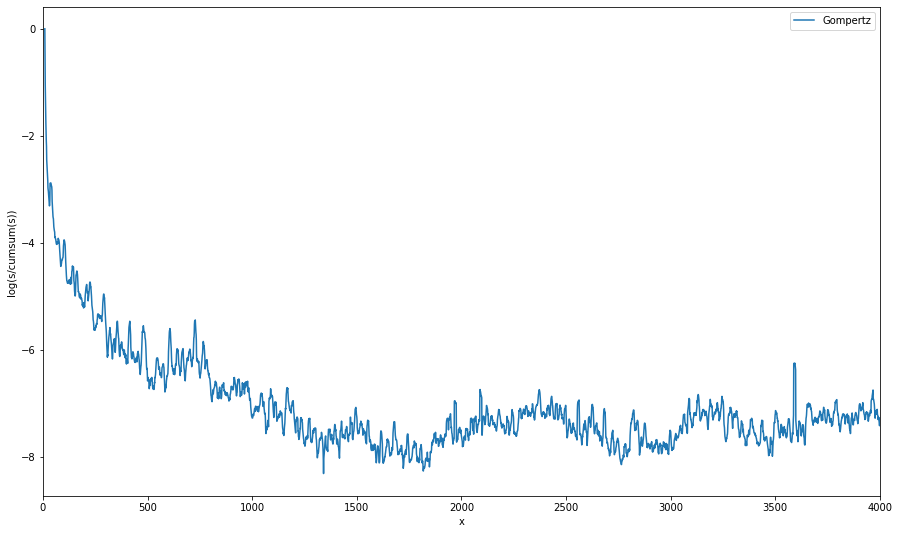

In [38]:
plt.figure(figsize=(15, 9))

plt.plot(gompertz, label=  "Gompertz")
plt.xlim(0, 4000)
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("log(s/cumsum(s))")
plt.show()

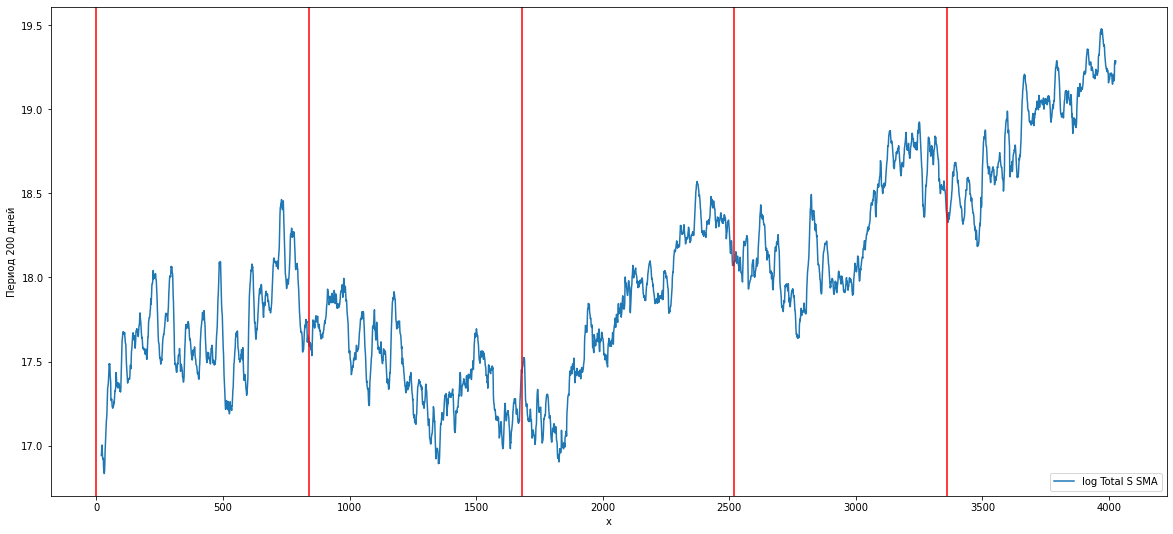

In [74]:
plt.figure(figsize=(20, 9))
period = 840
plt.plot((pd.Series(np.log(S))).rolling(window=20).mean(), label= "log Total S SMA")
for i in range(0,4000,period):
    plt.axvline(x=i,color = 'red')

plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("Период 200 дней")
plt.show()

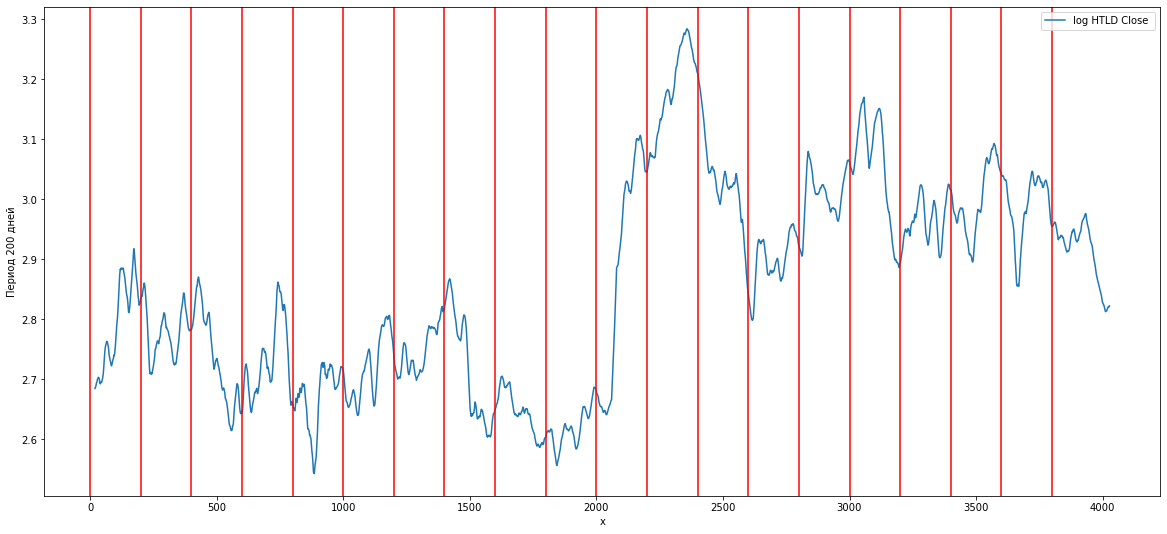

In [41]:
plt.figure(figsize=(20, 9))
period = 200
plt.plot((pd.Series(np.log(HTLD['Close']))).rolling(window=20).mean(), label= "log HTLD Close ")
for i in range(0,4000,period):
    plt.axvline(x=i,color = 'red')

plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("Период 200 дней")
plt.show()

In [40]:
type(gompertz)

pandas.core.series.Series

Угловой коэффициент прямой:-0.00035689850118258114
Характерное время модели Гомперца:2801.917062376294


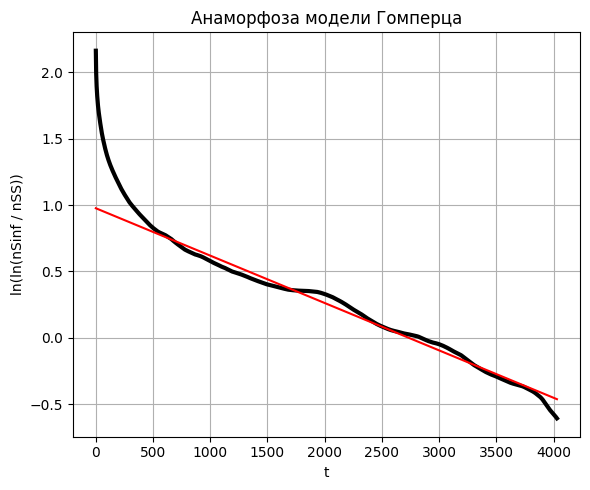

In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cm_to_inch(value):
    return value/2.54 

df[data[0]]['Close'] = (df[data[0]]['Close'] - min(df[data[0]]['Close'])) / (max(df[data[0]]['Close']) - min(df[data[0]]['Close']))
df[data[1]]['Close'] = (df[data[0]]['Close'] - min(df[data[1]]['Close'])) / (max(df[data[1]]['Close']) - min(df[data[1]]['Close']))
df[data[2]]['Close'] = (df[data[0]]['Close'] - min(df[data[2]]['Close'])) / (max(df[data[2]]['Close']) - min(df[data[2]]['Close']))
df[data[3]]['Close'] = (df[data[0]]['Close'] - min(df[data[3]]['Close'])) / (max(df[data[3]]['Close']) - min(df[data[3]]['Close']))
df[data[4]]['Close'] = (df[data[0]]['Close'] - min(df[data[4]]['Close'])) / (max(df[data[4]]['Close']) - min(df[data[4]]['Close']))
df[data[5]]['Close'] = (df[data[0]]['Close'] - min(df[data[5]]['Close'])) / (max(df[data[5]]['Close']) - min(df[data[5]]['Close']))


SS = df[data[0]]['Close'] + df[data[1]]['Close'] + df[data[2]]['Close'] + df[data[3]]['Close'] + df[data[4]]['Close'] + df[data[5]]['Close']
nS = (SS - min(SS)) / (max(SS) - min(SS))
fig, ax = plt.subplots(1, 1, figsize = (6, 5), dpi = 100, tight_layout = True)
Vinf = 2000
fig = plt.plot(np.arange(len(nS)) + 1, np.log(np.log(Vinf / nS.cumsum())),color = 'black', linewidth=3.0)
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('ln(ln(nSinf / nSS))')
ax.set_title('Анаморфоза модели Гомперца')
tst = np.polyfit(np.arange(1000, len(nS)), np.log(np.log(Vinf / nS.cumsum()))[1000:], deg = 1)
fig = plt.plot(np.arange(len(nS)) + 1, (np.arange(len(nS)) + 1) * tst[0] + tst[1], color = 'r')

print(f'Угловой коэффициент прямой:{tst[0]}') # коэффициенты прямой для анаморфозы Гомперца
print(f'Характерное время модели Гомперца:{-1/tst[0]}') # Харак вермя модели Гомперца

In [42]:
def out_of_trend(data,deltaT,typeP):
    if (typeP == 'FP'):
        result = [0 for i in range(deltaT)]
        for i in range(deltaT,len(data) - 2*deltaT):
            result.append(np.log( (data[i - deltaT]*data[i + 2 * deltaT] + data[i]*data[i + deltaT])/
                                 (data[i - deltaT]*data[i + deltaT] + data[i]*data[i + 2*deltaT] ) ))
        for i in range(len(data) - 2*deltaT,len(data)):
            result.append(0)
        return result
    else:
        result = [0 for i in range(deltaT)]
        if (typeP == 'GP'):
            for i in range(deltaT,len(data) - deltaT):
                result.append(np.log((data[i - deltaT]*data[i + deltaT])/(data[i]*data[i])))
        if (typeP == 'AP'):
            for i in range(deltaT,len(data) - deltaT):
                result.append(np.log((data[i - deltaT] + data[i + deltaT])/(2*data[i])))
        if (typeP == 'GarP'):
            for i in range(deltaT,len(data) - deltaT):
                result.append(np.log(2*(data[i - deltaT]*data[i + deltaT])/(data[i]*(data[i - deltaT]+data[i + deltaT]))))
        for i in range(len(data) - deltaT,len(data)):
            result.append(0)
        return result

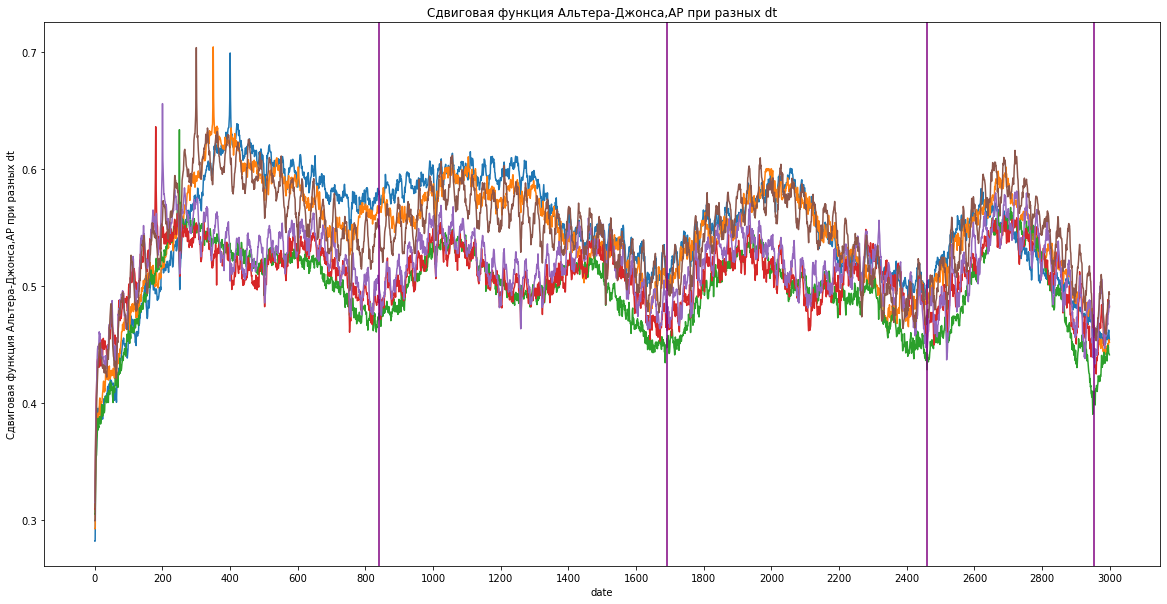

In [43]:

def alter_johns(data):
    result = []
    for tau in range(1,len(data) - 1):
        sum = 0
        for i in range(len(data) - tau):
            sum += abs(data[i + tau] - data[i])
        if (tau == 1):
            result.append(sum/(len(data) - tau))
        result.append(sum/(len(data) - tau))
    result.append(result[len(result) - 1])
    return result
gompertz = np.log(S_sma/cumsum_S)
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(0, 6000,200))
for i in (400, 350, 250, 180, 200, 300):
    alj = alter_johns(out_of_trend(S,i,'AP'))
    plt.plot(np.arange(gompertz.size)[:3000], alj[:3000])
plt.axvline(x=840,color = 'purple')
plt.axvline(x=1690,color = 'purple')
plt.axvline(x=2460,color = 'purple')
plt.axvline(x=2955,color = 'purple')


 
plt.title('Сдвиговая функция Альтера-Джонса,AP при разных dt')
plt.ylabel('Сдвиговая функция Альтера-Джонса,AP при разных dt')
plt.xlabel('date')
# plt.set(xlabel='date', ylabel='Сдвиговая функция Альтера-Джонса,AP при разных dt',
#        title='Сдвиговая функция Альтера-Джонса,AP при разных dt')
# ax.grid()
plt.show()
 
        

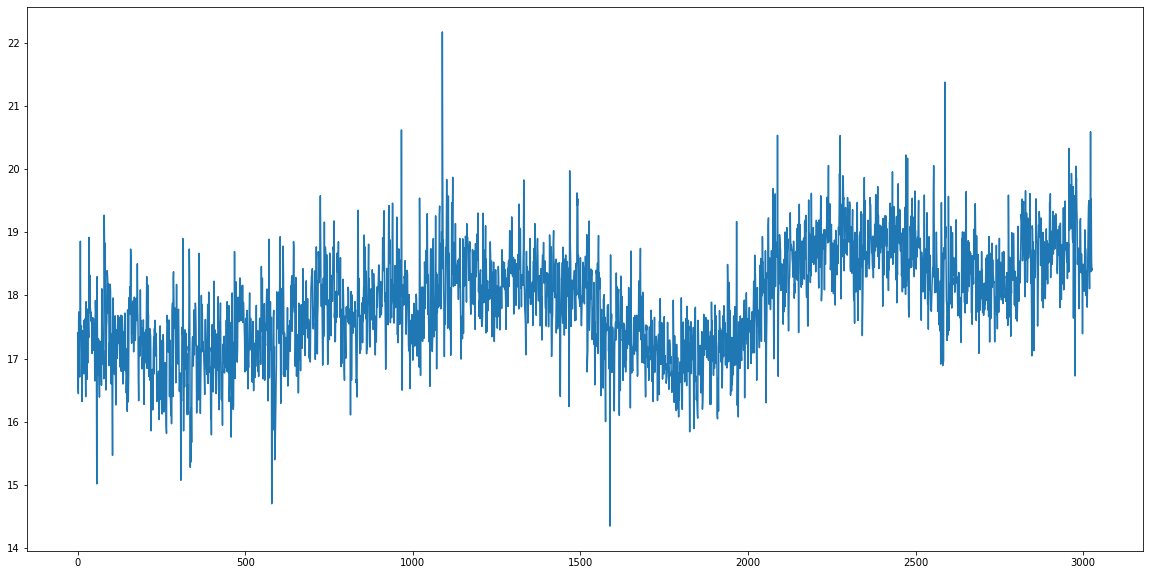

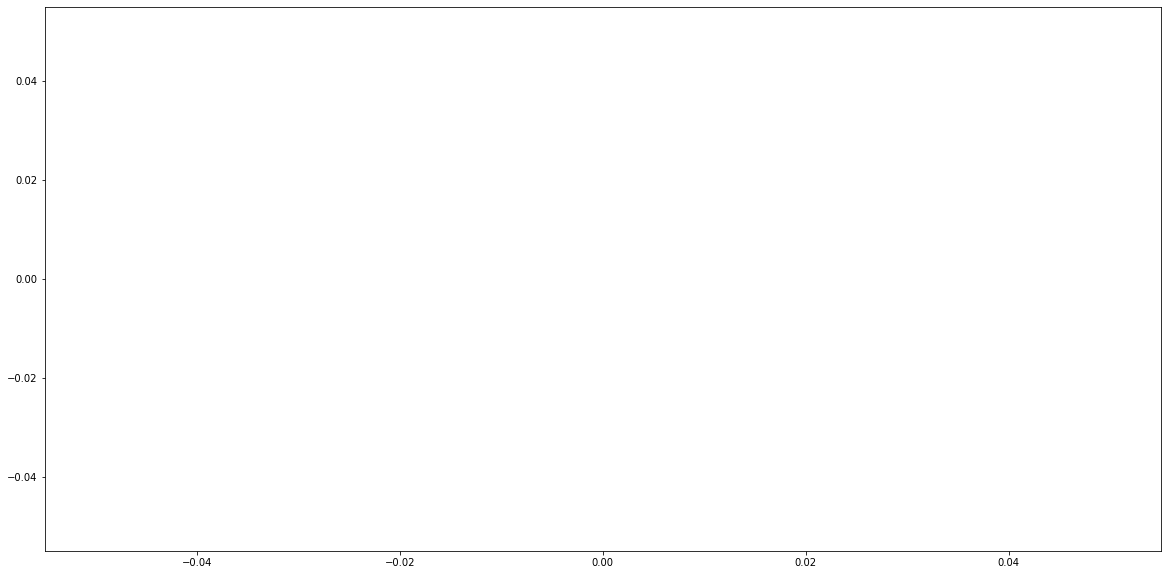

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


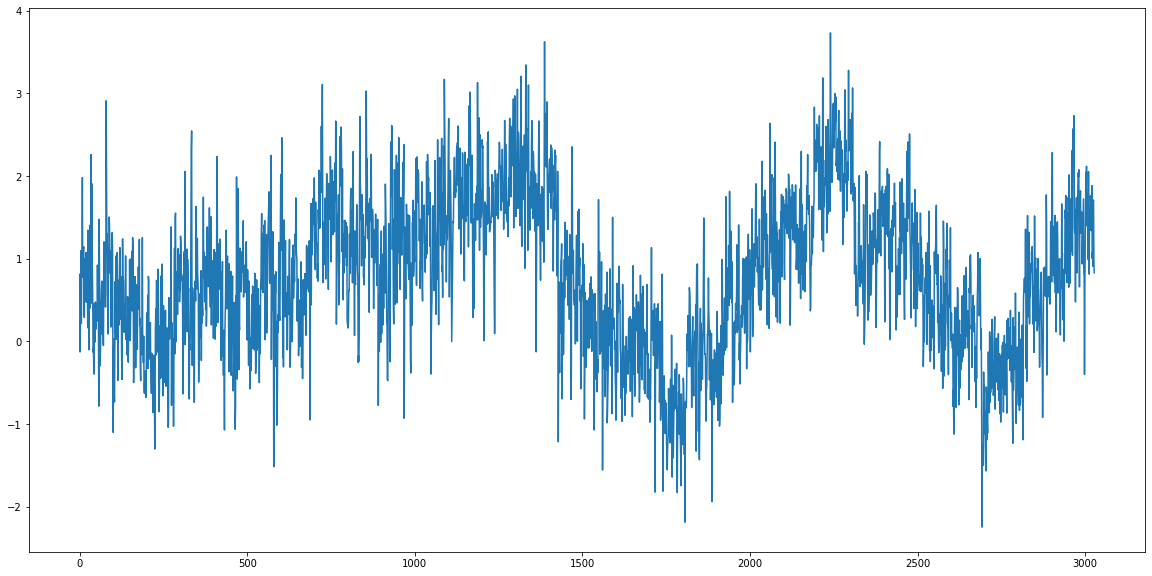

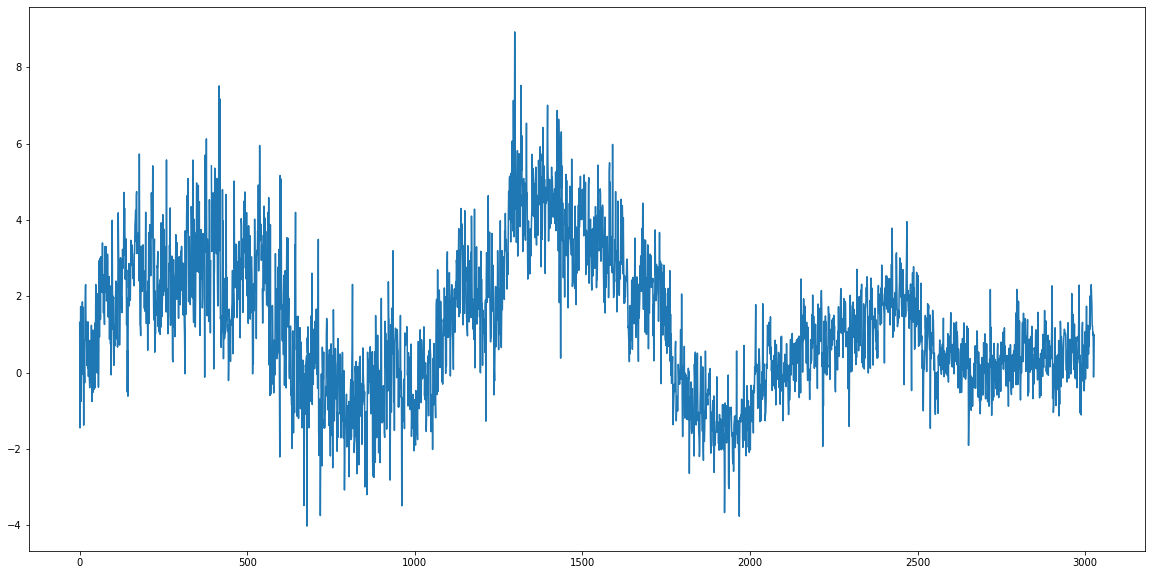

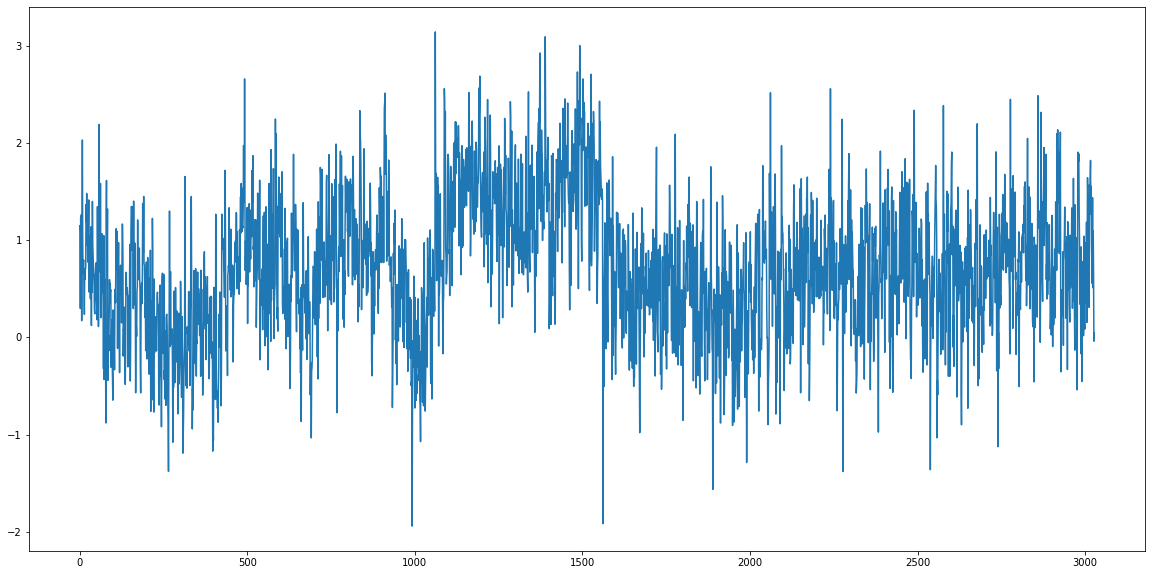

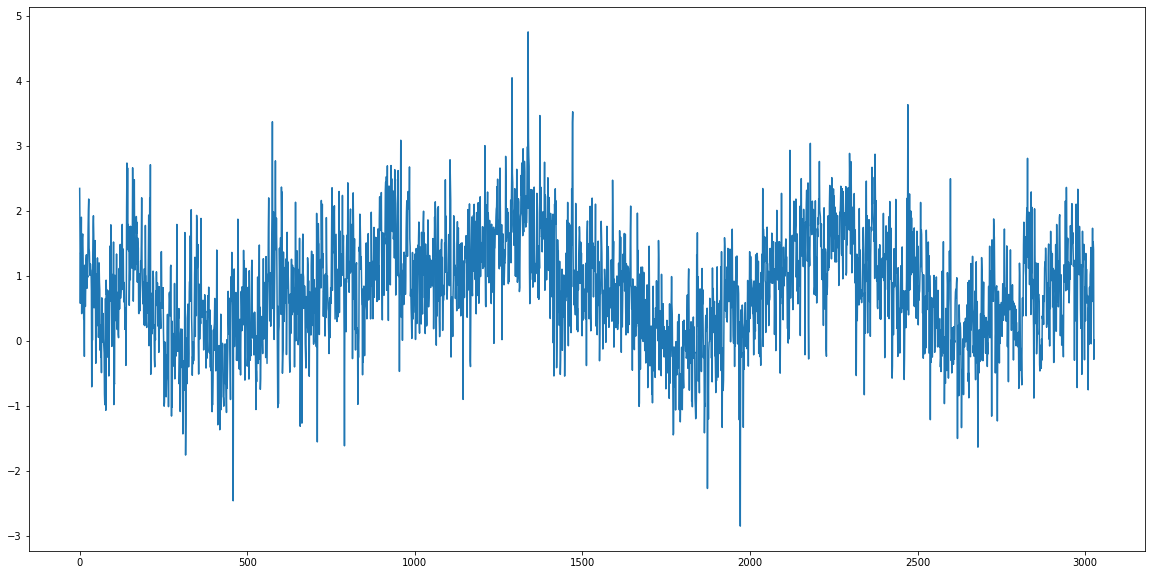

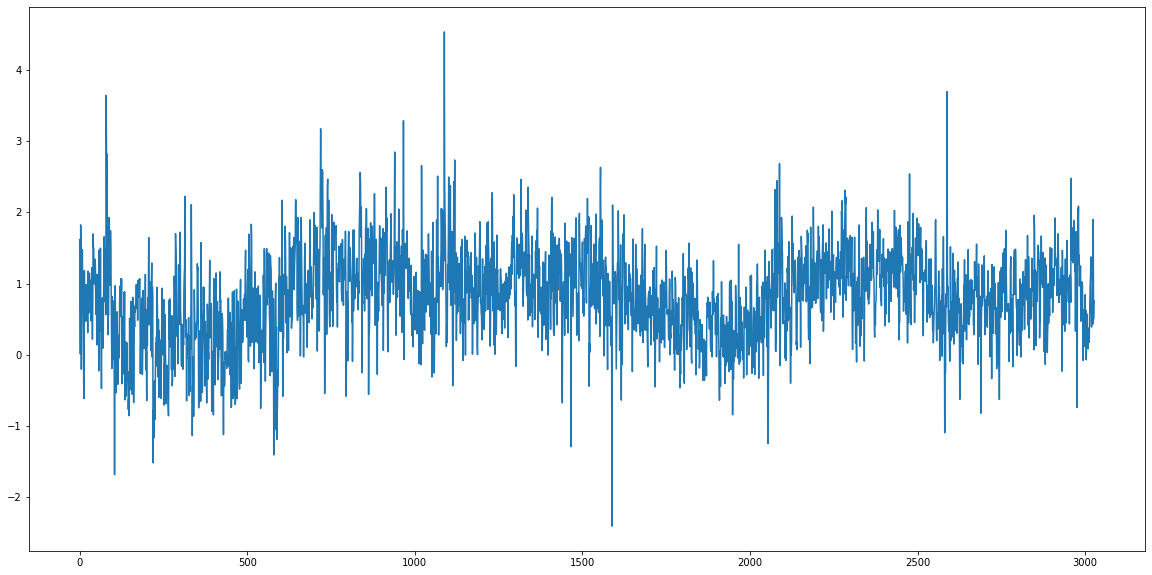

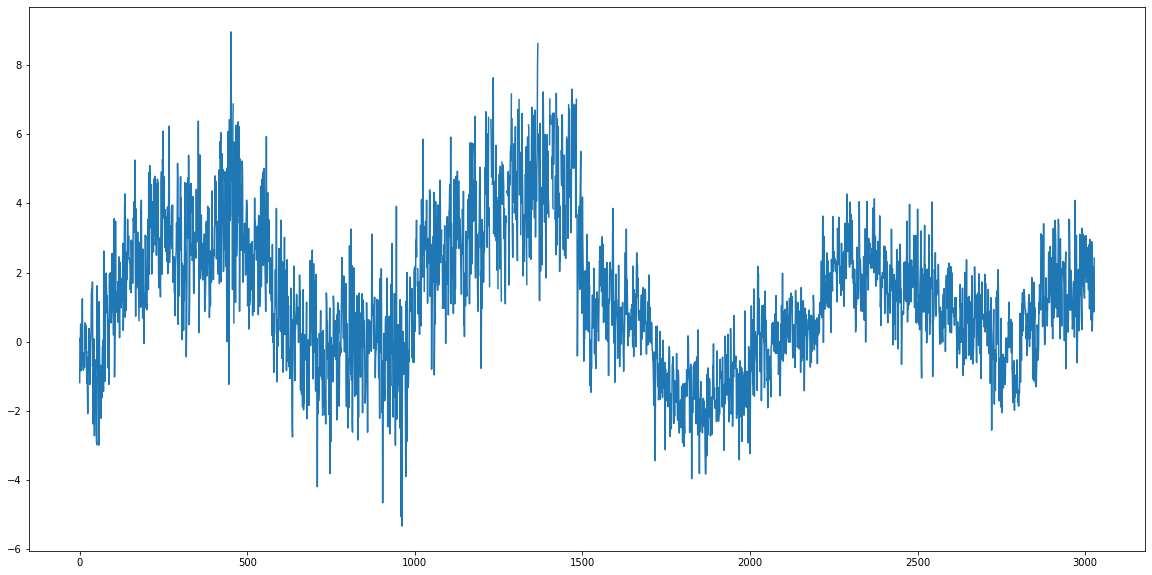

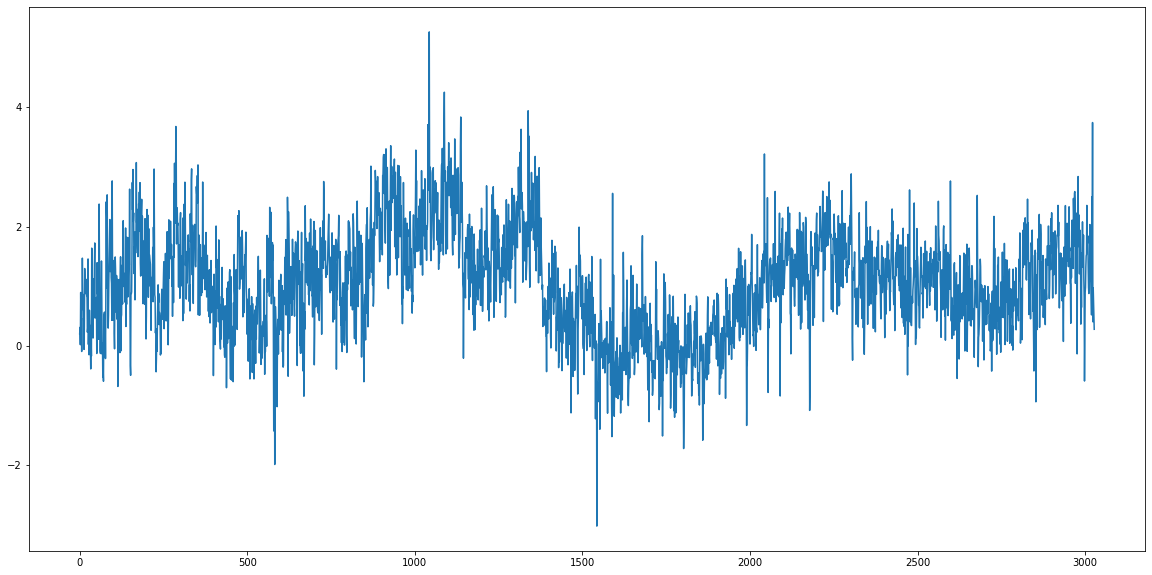

In [87]:
dt = 500
S_np = np.array(S)
S_mnp = np.array(S_norm)
plt.figure(figsize=(20,10))
plt.plot(np.log((S_np[2*dt:] * S_np[:-2 * dt])/S_np[dt:-dt]))
plt.show()
plt.figure(figsize=(20,10))
plt.plot(np.log((S_mnp[2*dt:] * S_mnp[:-2 * dt])/S_mnp[dt:-dt]))
plt.show()
for i in data:
    plt.figure(figsize = (20,10))
    plt.plot(np.log((np.array(df[i][2 * dt:]['CV']) + np.array(df[i][:-2 * dt]['CV'])) / np.array(df[i][dt:-dt]['CV'])) , label = i + 'out of trend')


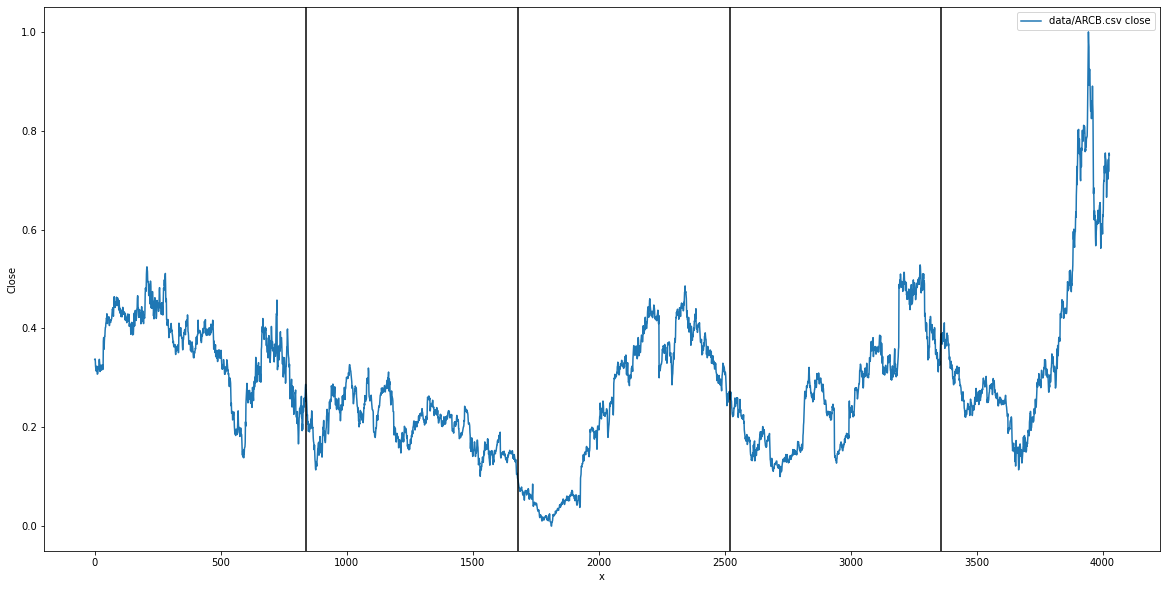

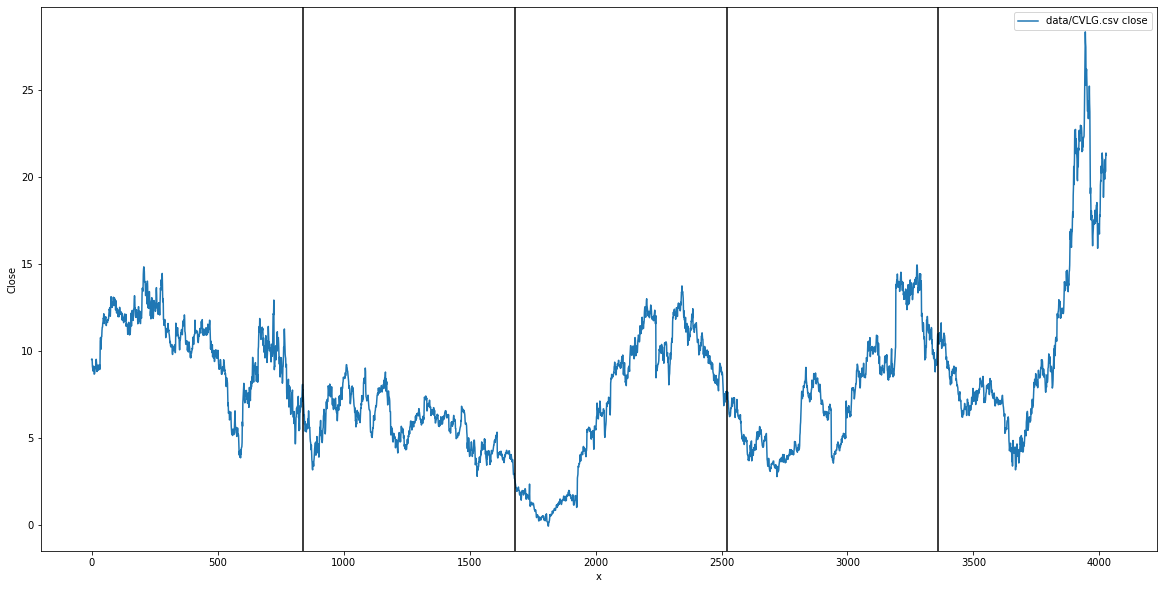

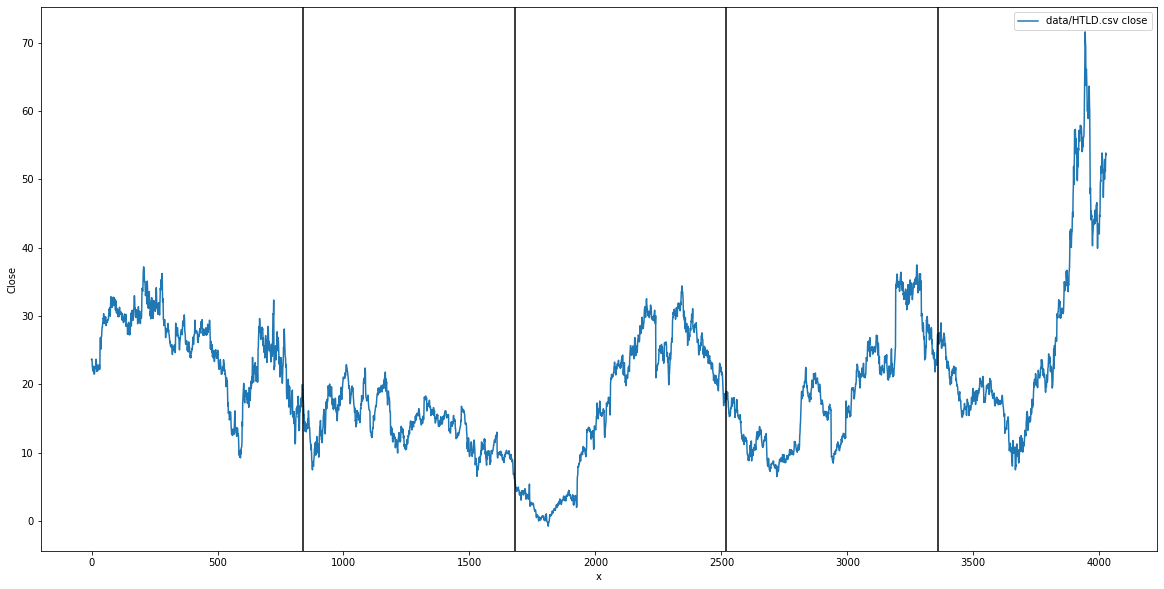

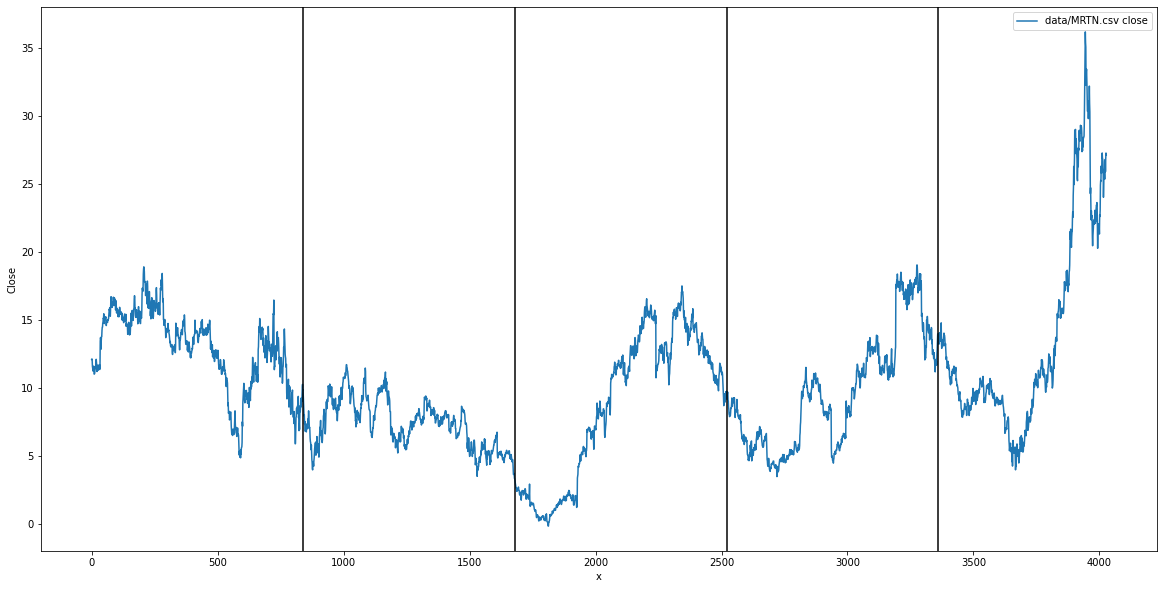

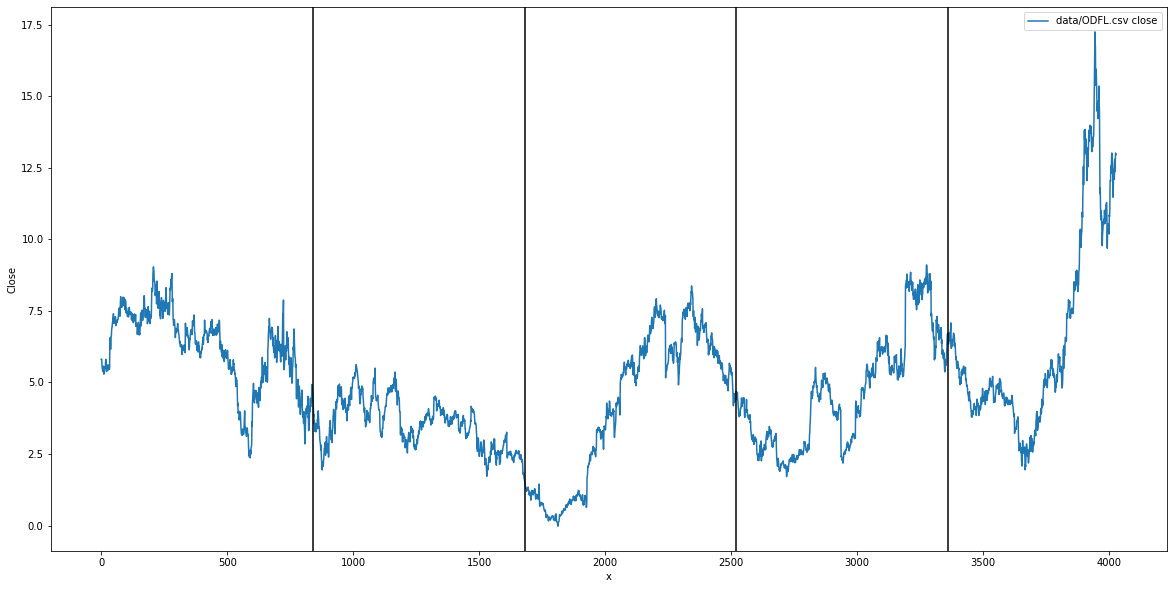

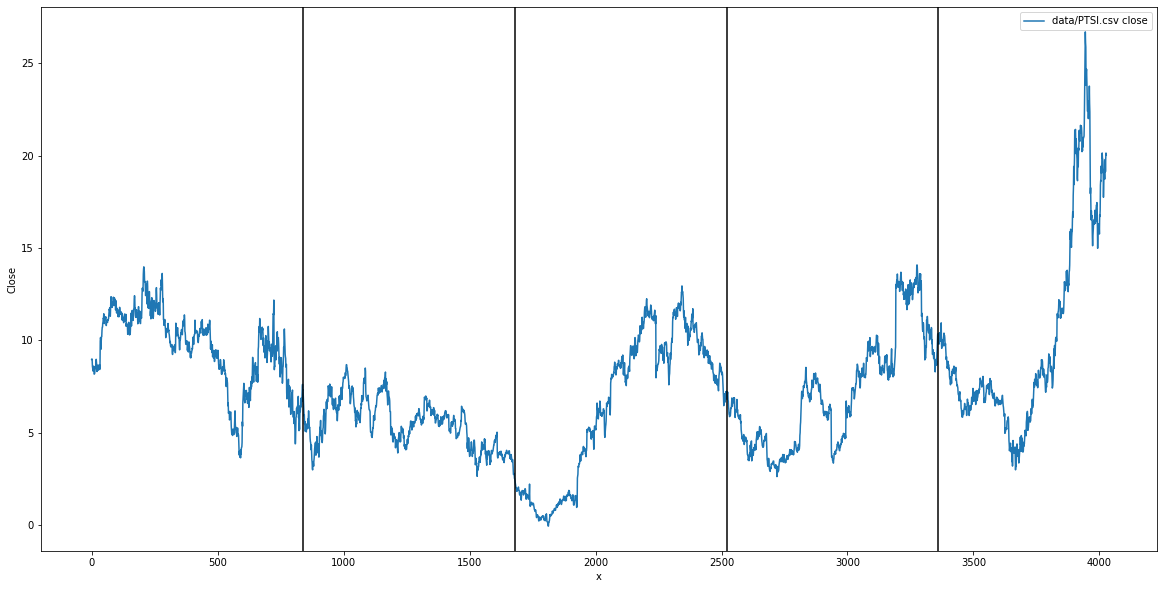

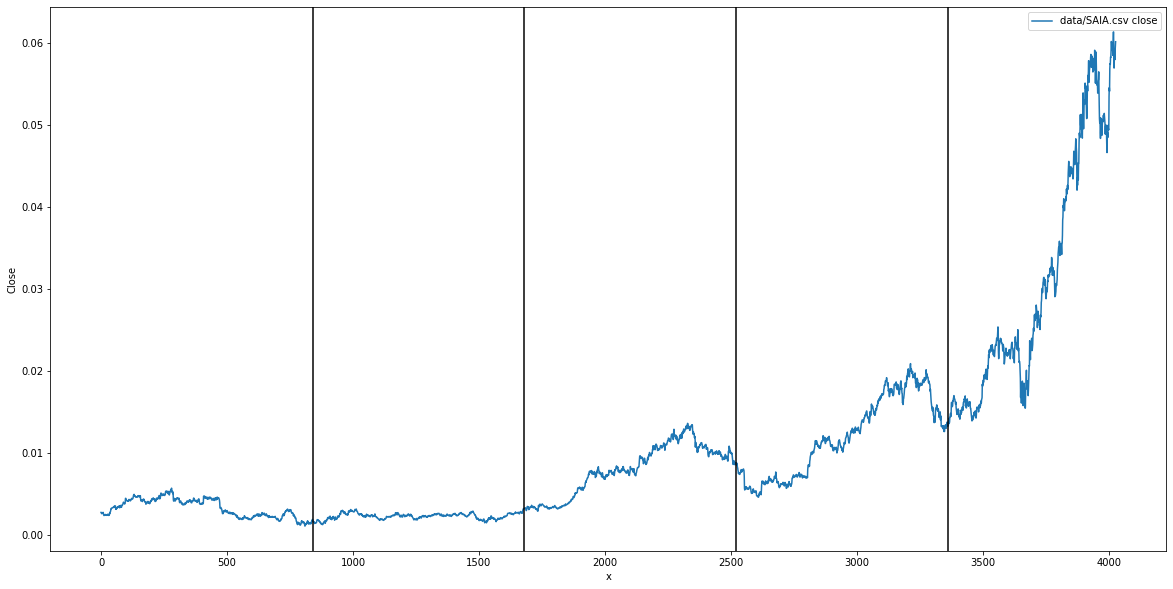

In [92]:

period = 840
for i in data:
    plt.figure(figsize=(20, 10))
 
    plt.plot(df[i]['Close'], label = i + " close")
    for j in range(840,4000,period):
        plt.axvline(x=j,color = 'black')
 
    plt.legend(loc='best')
    plt.xlabel("x")
    plt.ylabel("Close")
    plt.show()


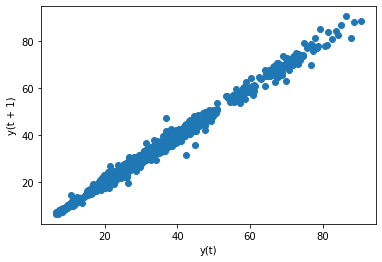

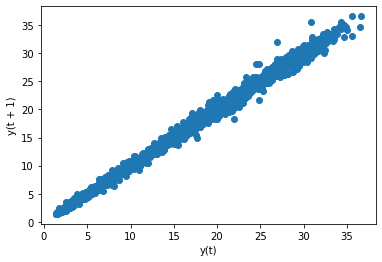

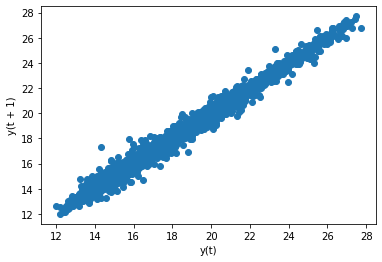

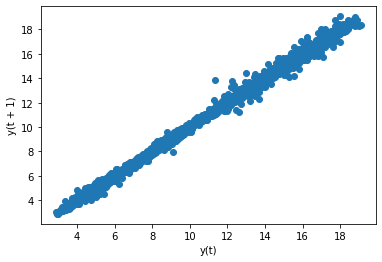

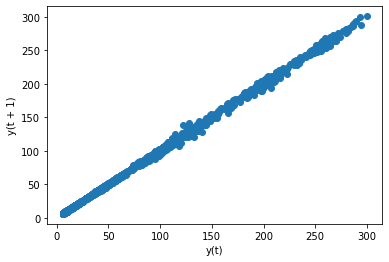

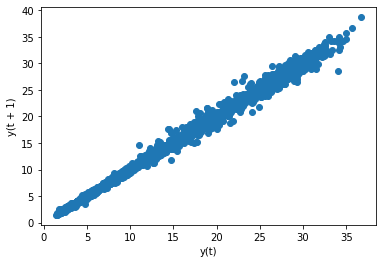

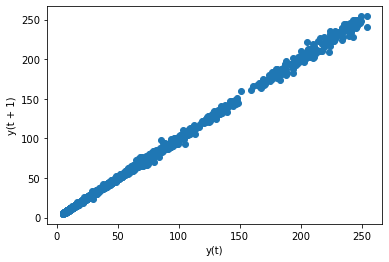

In [54]:
for i in data:
    temp = df[i]['Close']
    lag_plot(temp)
    pyplot.show()

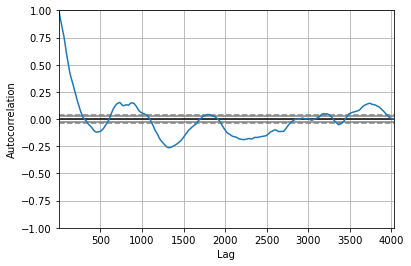

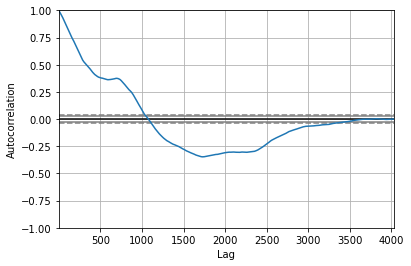

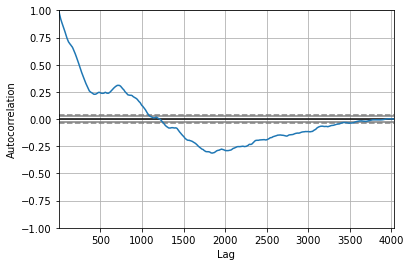

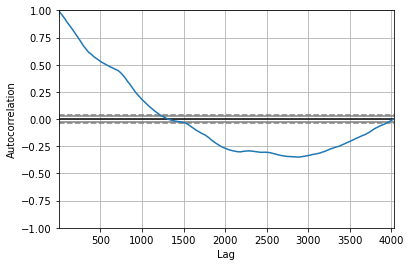

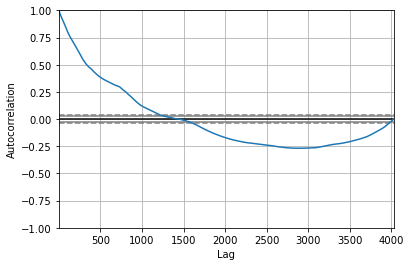

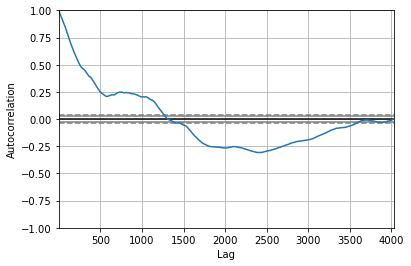

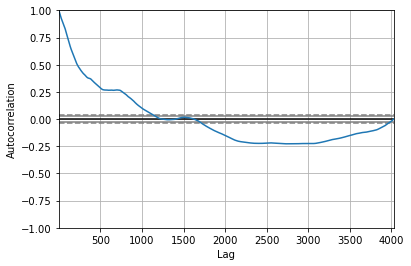

In [55]:

for i in data:
    temp = df[i]['Close']
    autocorrelation_plot(temp)

    pyplot.show()

сдвиговая функция


In [60]:
def alter_johns(data, p = 1):
    result = np.zeros(len(data))
    for tau in range(len(data) - 1):
        result[tau] = 1/(len(data) - tau) * sum(abs(data[tau:len(data)] - data[:(len(data) - tau)]) ** p) ** (1/p)
    return result